In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [4]:
data = spark.read.csv("Data/finalmergedlog10.csv",inferSchema=True,header=True)
data.show()

+----+-------------------+--------------------+---------------------+--------------------------+-----------------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+----------------------------------+-----------------------------------------------------+
|Year|United States Total|United States 1 Unit|United States 2 Units|United States 3 to 4 units|United States 5 Units or More|Northeast Total|Northeast 1 Unit|Midwest Total|Midwest 1 Unit|South Total|South 1 Unit|West Total|West 1 Unit|HONEY - PRODUCTION, MEASURED IN LB|HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES|
+----+-------------------+--------------------+---------------------+--------------------------+-----------------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+----------------------------------+-----------------------------------------------------+
|1990|             111

In [5]:
data.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- United States Total: double (nullable = true)
 |-- United States 1 Unit: double (nullable = true)
 |-- United States 2 Units: double (nullable = true)
 |-- United States 3 to 4 units: double (nullable = true)
 |-- United States 5 Units or More: double (nullable = true)
 |-- Northeast Total: double (nullable = true)
 |-- Northeast 1 Unit: double (nullable = true)
 |-- Midwest Total: double (nullable = true)
 |-- Midwest 1 Unit: double (nullable = true)
 |-- South Total: double (nullable = true)
 |-- South 1 Unit: double (nullable = true)
 |-- West Total: double (nullable = true)
 |-- West 1 Unit: double (nullable = true)
 |-- HONEY - PRODUCTION, MEASURED IN LB: double (nullable = true)
 |-- HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES: double (nullable = true)



In [6]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [7]:
assembler = VectorAssembler(
    inputCols=["United States Total", "United States 1 Unit","United States 2 Units", "United States 3 to 4 units",
              "United States 5 Units or More", "Northeast Total", "Northeast 1 Unit", "Midwest Total", "Midwest 1 Unit",
              "South Total", "South 1 Unit", "West Total", "West 1 Unit"],
    outputCol="features")

In [8]:
output = assembler.transform(data)

In [9]:
output.printSchema()


root
 |-- Year: integer (nullable = true)
 |-- United States Total: double (nullable = true)
 |-- United States 1 Unit: double (nullable = true)
 |-- United States 2 Units: double (nullable = true)
 |-- United States 3 to 4 units: double (nullable = true)
 |-- United States 5 Units or More: double (nullable = true)
 |-- Northeast Total: double (nullable = true)
 |-- Northeast 1 Unit: double (nullable = true)
 |-- Midwest Total: double (nullable = true)
 |-- Midwest 1 Unit: double (nullable = true)
 |-- South Total: double (nullable = true)
 |-- South 1 Unit: double (nullable = true)
 |-- West Total: double (nullable = true)
 |-- West 1 Unit: double (nullable = true)
 |-- HONEY - PRODUCTION, MEASURED IN LB: double (nullable = true)
 |-- HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES: double (nullable = true)
 |-- features: vector (nullable = true)



In [10]:
final_data = output.select("features","HONEY - PRODUCTION, MEASURED IN LB")
final_data.show()

+--------------------+----------------------------------+
|            features|HONEY - PRODUCTION, MEASURED IN LB|
+--------------------+----------------------------------+
|[1110.8,793.9,26....|                 8.298003298071777|
|[948.8,753.5,22.0...|                 8.344441399241624|
|[1094.9,910.7,23....|                 8.345683410316864|
|[1199.1,986.5,26....|                 8.362979818962618|
|[1371.6,1068.5,31...|                 8.338570032823604|
|[1332.5,997.3,32....|                 8.324621936747661|
|[1425.6,1069.5,33...|                  8.30009308116713|
|[1441.1,1062.4,34...|                 8.293223292933632|
|[1612.3,1187.6,33...|                 8.343461769464422|
|[1663.5,1246.7,32...|                 8.307641491507416|
|[1592.3,1198.1,30...|                 8.342986896987583|
|[1636.7,1235.6,31...|                 8.269632008640352|
|[1747.7,1332.6,37...|                 8.234815821607878|
|[1889.2,1460.9,40...|                 8.259412287678185|
|[2070.1,1613.

In [18]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [19]:
train_data.describe().show()

test_data.describe().show()

+-------+----------------------------------+
|summary|HONEY - PRODUCTION, MEASURED IN LB|
+-------+----------------------------------+
|  count|                                24|
|   mean|                 8.245691272744404|
| stddev|               0.06708461101688033|
|    min|                  8.15319269205657|
|    max|                 8.362979818962618|
+-------+----------------------------------+

+-------+----------------------------------+
|summary|HONEY - PRODUCTION, MEASURED IN LB|
+-------+----------------------------------+
|  count|                                 7|
|   mean|                 8.263402386526584|
| stddev|                0.0715275436403826|
|    min|                 8.171308042662647|
|    max|                 8.343461769464422|
+-------+----------------------------------+



In [20]:
lr = LinearRegression(labelCol='HONEY - PRODUCTION, MEASURED IN LB')

In [21]:
lrModel = lr.fit(train_data)

In [22]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.1348857908480709,0.0005207193659993826,-0.06712378346800096,-0.0755637439288512,-0.07006608788386542,-0.06504269724474479,-0.06663946267825956,-0.0655024480329081,-0.07056183501709871,-0.06541942954625406,-0.07046216840566642,-0.06327119821739066,-0.07139964343943891] Intercept: 8.157103385065804


In [23]:
test_results = lrModel.evaluate(test_data)

In [83]:
test_results.residuals.show()

print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|-0.05348909273597968|
|-0.02373094917176...|
| -0.0530829970548119|
| 0.05173856984362324|
| 0.01651801249517959|
|0.011578168300669489|
|-0.03801857840749712|
|-0.02168498718451...|
+--------------------+

RSME: 0.03748578875288091


In [24]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.44402376665636556


In [11]:
final_data.describe().show()

+-------+----------------------------------+
|summary|HONEY - PRODUCTION, MEASURED IN LB|
+-------+----------------------------------+
|  count|                                31|
|   mean|                 8.249690556501674|
| stddev|               0.06730652154610096|
|    min|                  8.15319269205657|
|    max|                 8.362979818962618|
+-------+----------------------------------+



                                             features  \
0   [1110.8, 793.9, 26.7, 27.6, 262.6, 125.8, 96.5...   
1   [948.8, 753.5, 22.0, 21.1, 152.1, 109.8, 91.8,...   
2   [1094.9, 910.7, 23.3, 22.5, 138.4, 124.8, 108....   
3   [1199.1, 986.5, 26.7, 25.6, 160.2, 133.5, 113....   
4   [1371.6, 1068.5, 31.4, 30.8, 241.0, 138.5, 119...   
5   [1332.5, 997.3, 32.2, 31.5, 271.5, 124.2, 104....   
6   [1425.6, 1069.5, 33.6, 32.2, 290.3, 136.9, 108...   
7   [1441.1, 1062.4, 34.9, 33.6, 310.3, 141.9, 111...   
8   [1612.3, 1187.6, 33.2, 36.0, 355.5, 159.4, 124...   
9   [1663.5, 1246.7, 32.5, 33.3, 351.1, 164.9, 127...   
10  [1592.3, 1198.1, 30.6, 34.3, 329.3, 165.1, 122...   
11  [1636.7, 1235.6, 31.8, 34.2, 335.2, 159.8, 117...   
12  [1747.7, 1332.6, 37.2, 36.5, 341.4, 173.7, 126...   
13  [1889.2, 1460.9, 40.9, 41.6, 345.8, 182.4, 124...   
14  [2070.1, 1613.4, 43.0, 47.4, 366.2, 197.0, 131...   
15  [2155.3, 1682.0, 39.3, 44.7, 389.3, 203.8, 126...   
16  [1838.9, 1378.2, 35.3, 41.3

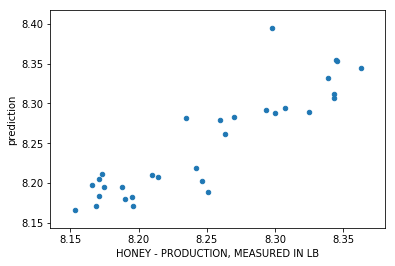

In [26]:
import matplotlib.pyplot as plt


rfPred = lrModel.transform(final_data)
rfResult = rfPred.toPandas()

print(rfResult)

rfResult.plot.scatter(x='HONEY - PRODUCTION, MEASURED IN LB', y='prediction', style='o')